In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sonar = pd.read_csv('sonar.all-data.csv', header=None, sep=',')
sonar1 = sonar.iloc[0:208,0:60]
sonar2 = np.array(sonar1)

In [6]:
sonar_dataframe=pd.DataFrame(sonar2)

In [10]:
def Fisher(X1, X2, n):  #Fisher线性判别过程
    X1 = X1[:, 0:n]
    X2 = X2[:, 0:n]
    m1 = (np.mean(X1, axis=0))
    m2 = (np.mean(X2, axis=0))
    m1 = m1.reshape(n, 1)  # 将行向量转换为列向量以便于计算
    m2 = m2.reshape(n, 1)

    # 计算类内离散度矩阵
    S1 = np.zeros((n, n))
    S2 = np.zeros((n, n))
    for i in range(0, X1.shape[0]):
        S1 += (X1[i].reshape(n, 1) - m1).dot((X1[i].reshape(n, 1) - m1).T)
    for i in range(0, X2.shape[0]):
        S2 += (X2[i].reshape(n, 1) - m2).dot((X2[i].reshape(n, 1) - m2).T)
    # 计算总类内离散度矩阵S_w
    S_w = S1 + S2

    # 计算最优投影方向 W
    W = np.linalg.inv(S_w).dot(m1 - m2)
    # 在投影后的一维空间求两类的均值
    m_1 = (W.T).dot(m1)
    m_2 = (W.T).dot(m2)

    # 计算分类阈值 W0(为一个列向量)
    W0 = 0.5 * (m_1 + m_2)

    return W, W0


In [11]:
def Classify(X, W, W0, n):
    y = (W.T).dot(X[0:n, :]) - W0
    return y

In [13]:
P1 = sonar2[0:104, 0:60]
P2 = sonar2[104:208, 0:60]

result = np.zeros(208)
Accuracy = np.zeros(60)

for n in range(1, 61):
    count = 0
    for i in range(208):
        if i <= 103:
            test = P1[i]
            test = test.reshape(60, 1)
            train = np.delete(P1, i, axis=0)
            W,W0 = Fisher(train, P2, n)
            if (Classify(test, W, W0, n)) >= 0:
                count += 1
                result[i] = Classify(test, W, W0, n)
        else:
            test = P2[i-104]
            test = test.reshape(60, 1)
            train = np.delete(P2, i-104, axis=0)
            W,W0 = Fisher(P1, train, n)
            if (Classify(test, W, W0, n)) < 0:
                count += 1
                result[i] = Classify(test, W, W0, n)
    Accuracy[n-1] = count/208
    print("分类准确率在维数取%d时为:%.3f" % (n, Accuracy[n-1]))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2228\3779961726.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i] = Classify(test, W, W0, n)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2228\3779961726.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i] = Classify(test, W, W0, n)


分类准确率在维数取1时为:0.587
分类准确率在维数取2时为:0.587
分类准确率在维数取3时为:0.543
分类准确率在维数取4时为:0.577
分类准确率在维数取5时为:0.577
分类准确率在维数取6时为:0.572
分类准确率在维数取7时为:0.572
分类准确率在维数取8时为:0.587
分类准确率在维数取9时为:0.649
分类准确率在维数取10时为:0.644
分类准确率在维数取11时为:0.716
分类准确率在维数取12时为:0.692
分类准确率在维数取13时为:0.716
分类准确率在维数取14时为:0.716
分类准确率在维数取15时为:0.702
分类准确率在维数取16时为:0.688
分类准确率在维数取17时为:0.678
分类准确率在维数取18时为:0.668
分类准确率在维数取19时为:0.678
分类准确率在维数取20时为:0.654
分类准确率在维数取21时为:0.659
分类准确率在维数取22时为:0.716
分类准确率在维数取23时为:0.726
分类准确率在维数取24时为:0.726
分类准确率在维数取25时为:0.716
分类准确率在维数取26时为:0.721
分类准确率在维数取27时为:0.721
分类准确率在维数取28时为:0.712
分类准确率在维数取29时为:0.707
分类准确率在维数取30时为:0.688
分类准确率在维数取31时为:0.731
分类准确率在维数取32时为:0.716
分类准确率在维数取33时为:0.721
分类准确率在维数取34时为:0.716
分类准确率在维数取35时为:0.712
分类准确率在维数取36时为:0.707
分类准确率在维数取37时为:0.707
分类准确率在维数取38时为:0.707
分类准确率在维数取39时为:0.697
分类准确率在维数取40时为:0.712
分类准确率在维数取41时为:0.736
分类准确率在维数取42时为:0.721
分类准确率在维数取43时为:0.740
分类准确率在维数取44时为:0.750
分类准确率在维数取45时为:0.750
分类准确率在维数取46时为:0.740
分类准确率在维数取47时为:0.764
分类准确率在维数取48时为:0.760
分类准确率在维数取49时为:0.788
分类准确率在维数取50时为:0.803
分类准确率在维数取

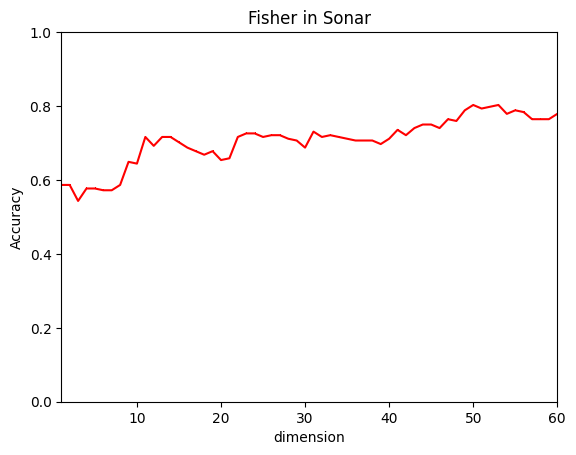

In [14]:
#画曲线图
x = np.arange(1, 61, 1)
plt.title("Fisher in Sonar")
plt.xlabel('dimension')
plt.ylabel('Accuracy')
plt.xlim((1, 60))
plt.ylim((0, 1.0))
plt.plot(x, Accuracy, 'r-,')
plt.show()